In [2]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering


In [3]:
land_mines = fetch_ucirepo(id=763)

In [4]:
x = land_mines.data.features
y = land_mines.data.targets

df = pd.concat([x,y], axis=1)
columns = ["voltage", "height","soiltype","minetype"]
df.columns = columns

print(df.head(),"\n\n")
print(df.info(),"\n\n")
print(df.describe(),"\n\n")
print(df.isnull().sum())

    voltage    height  soiltype  minetype
0  0.338157  0.000000       0.0         1
1  0.320241  0.181818       0.0         1
2  0.287009  0.272727       0.0         1
3  0.256284  0.454545       0.0         1
4  0.262840  0.545455       0.0         1 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   voltage   338 non-null    float64
 1   height    338 non-null    float64
 2   soiltype  338 non-null    float64
 3   minetype  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB
None 


          voltage      height    soiltype    minetype
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.5

In [5]:
print(df)

      voltage    height  soiltype  minetype
0    0.338157  0.000000       0.0         1
1    0.320241  0.181818       0.0         1
2    0.287009  0.272727       0.0         1
3    0.256284  0.454545       0.0         1
4    0.262840  0.545455       0.0         1
..        ...       ...       ...       ...
333  0.323262  0.909091       0.4         5
334  0.444108  0.181818       1.0         5
335  0.353474  0.454545       1.0         5
336  0.362537  0.727273       1.0         5
337  0.314199  1.000000       1.0         5

[338 rows x 4 columns]


In [6]:
def find_outliers(df, features):
    outliers = pd.DataFrame()
    for i in features:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        iqr = Q3 - Q1

        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        outliers_features = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        outliers = pd.concat([outliers, outliers_features])

    outliers = outliers.drop_duplicates().reset_index(drop=True)
    return outliers

outliers = find_outliers(df, columns[:-1])
print("Outliers: \n", outliers)

Outliers: 
      voltage    height  soiltype  minetype
0   0.999999  0.000000       0.0         2
1   0.999999  0.090909       0.0         2
2   0.999999  0.272727       0.0         2
3   0.906343  0.363636       0.0         2
4   0.999999  0.000000       0.6         2
5   0.999999  0.090909       0.6         2
6   0.975830  0.272727       0.6         2
7   0.815709  0.363636       0.6         2
8   0.999999  0.000000       0.8         2
9   0.912386  0.181818       0.8         2
10  0.957703  0.272727       0.8         2
11  0.758307  0.454545       0.8         2
12  0.999999  0.000000       0.4         2
13  0.999999  0.181818       0.4         2
14  0.999999  0.272727       0.4         2
15  0.999999  0.454545       0.4         2
16  0.999999  0.545455       0.4         2
17  0.854984  0.727273       0.4         2
18  0.999999  0.000000       1.0         2
19  0.891238  0.181818       1.0         2
20  0.999999  0.272727       1.0         2
21  0.809667  0.454545       1.0         2

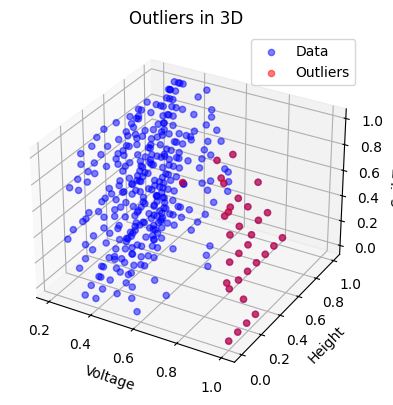

In [7]:
fig = plt.figure(figsize=(10, 10))
gh = fig.add_subplot(121, projection='3d')
gh.scatter(df["voltage"], df["height"], df["soiltype"], c='blue', alpha=0.5, label='Data')
gh.scatter(outliers["voltage"], outliers["height"], outliers["soiltype"], c='red', alpha=0.5, label='Outliers')
gh.set_title("Outliers in 3D")
gh.set_xlabel("Voltage")
gh.set_ylabel("Height")
gh.set_zlabel("Soil Type")
plt.legend()
plt.show()
# here we are not removing outliers as they are many and if removed, would effect the dataset

In [8]:
features = df.drop("minetype", axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

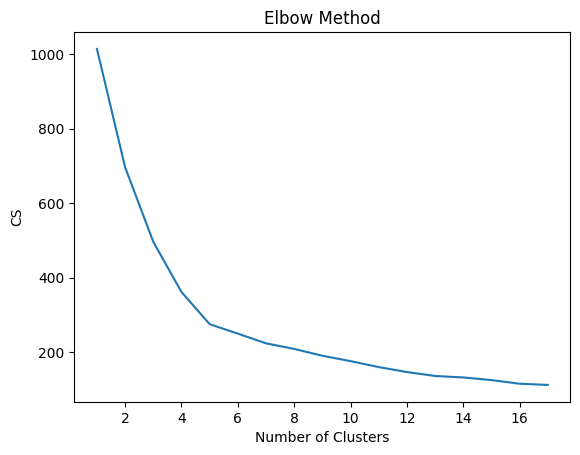

In [9]:
cs = []
for i in range(1,18):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,random_state=0)
    kmeans.fit(scaled)
    cs.append(kmeans.inertia_)

plt.plot(range(1,18), cs)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("CS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(scaled)
labels = kmeans.labels_
df['cluster_value'] = labels

In [11]:
df

,voltage,height,soiltype,minetype,cluster_value
0,0.338157,0.000000,0.0,1,4
1,0.320241,0.181818,0.0,1,4
2,0.287009,0.272727,0.0,1,4
3,0.256284,0.454545,0.0,1,4
4,0.262840,0.545455,0.0,1,0
...,...,...,...,...,...
333,0.323262,0.909091,0.4,5,0
334,0.444108,0.181818,1.0,5,1
335,0.353474,0.454545,1.0,5,1
336,0.362537,0.727273,1.0,5,2


## Visualizing Clusters

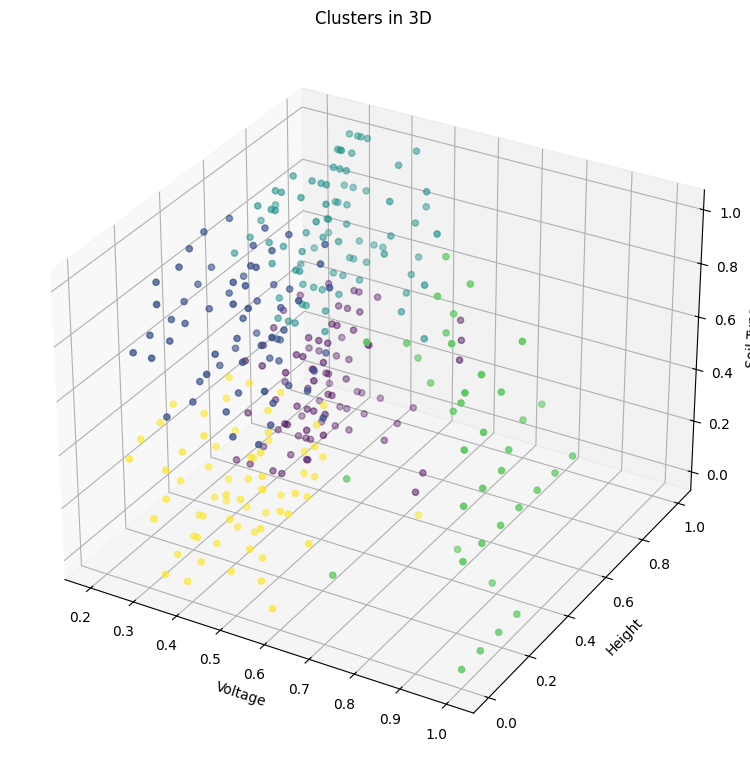

In [12]:
fig = plt.figure(figsize=(15, 10))

gh = fig.add_subplot(121, projection='3d')
gh.scatter(df['voltage'], df['height'],df['soiltype'], c=df['cluster_value'], cmap='viridis')
gh.set_title("Clusters in 3D")
gh.set_xlabel("Voltage")
gh.set_ylabel("Height")
gh.set_zlabel("Soil Type")

plt.tight_layout()
plt.show()

In [13]:
def gen_augmented_data(df, num_dpoints_per_cluster = 100, noise_levels=None, integer_features=None, decimal_features=None, cluster_features='cluster_value'):
    if noise_levels is None:
        noise_levels = 0.1
    if isinstance(noise_levels, float):
        noise_levels = {col: noise_levels for col in df.drop(columns=[cluster_features]).columns}
    if integer_features is None:
        integer_features = []
    if decimal_features is None:
        decimal_features = {}

    cluster_means = df.groupby(cluster_features).mean().reset_index()
    augmented_data = []

    for idx, row in cluster_means.iterrows():
        cluster = row[cluster_features]
        cluster_mean_values = row.drop(cluster_features)
        cluster_augmented = pd.DataFrame(columns = df.columns.drop([cluster_features]))

        for feature in cluster_mean_values.index:
            noise = np.random.normal(0, noise_levels[feature], num_dpoints_per_cluster)
            max_val = df[feature].max() * 1.1
            min_val = df[feature].min() * 0.9
            augmented_feature_values = np.clip(cluster_mean_values[feature] + noise, min_val, max_val)

            if feature in integer_features:
                augmented_feature_values = np.round(augmented_feature_values).astype(int)
            if feature in decimal_features:
                decimal_places = decimal_features[feature]
                augmented_feature_values = np.round(augmented_feature_values, decimals = decimal_places)
            cluster_augmented[feature] = augmented_feature_values

        cluster_augmented[cluster_features] = cluster
        augmented_data.append(cluster_augmented)

    augmented_data_df = pd.concat(augmented_data, ignore_index=True)

    return augmented_data_df

In [14]:
augmented_data = gen_augmented_data(
    df,
    num_dpoints_per_cluster=100,
    noise_levels={'voltage':0.1,'height':0.2, 'soiltype':0.2,'minetype':0.1},
    integer_features=['minetype'],
    decimal_features={'soiltype':1}
)

print(augmented_data.head(102))

      voltage    height  soiltype  minetype  cluster_value
0    0.362629  0.528216       0.0         3            0.0
1    0.407896  0.728775       0.0         3            0.0
2    0.419185  0.594298       0.1         3            0.0
3    0.356484  0.628263       0.3         3            0.0
4    0.212890  0.866167       0.3         3            0.0
..        ...       ...       ...       ...            ...
97   0.312350  0.676250       0.4         3            0.0
98   0.256738  0.763410       0.1         3            0.0
99   0.272940  0.699298       0.1         3            0.0
100  0.315640  0.174753       0.6         3            1.0
101  0.343175  0.234513       0.9         3            1.0

[102 rows x 5 columns]


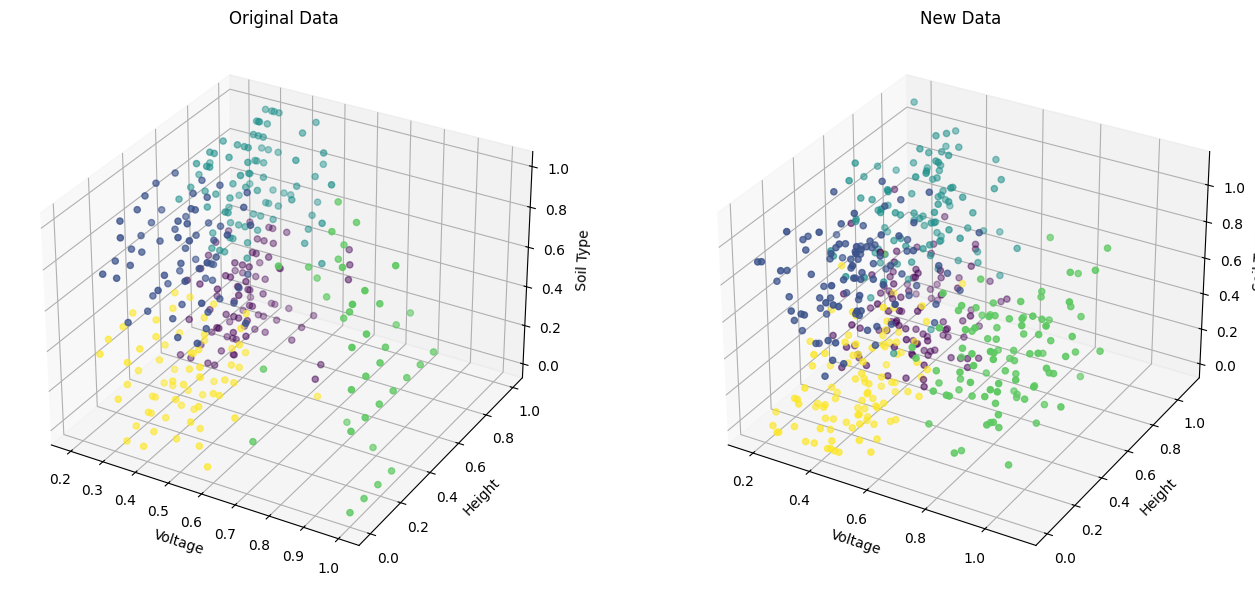

Silhouette Score for Original Data: 0.35216914756272893
Silhouette Score for augmented Data: 0.3203828279198341


In [15]:
df['source'] = 'original'
augmented_data['source'] = 'augmented'
combined_data = pd.concat([df, augmented_data], ignore_index=True)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['voltage'], df['height'], df['soiltype'], c=df['cluster_value'], cmap='viridis')
ax1.set_title('Original Data')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Height')
ax1.set_zlabel('Soil Type')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(augmented_data['voltage'], augmented_data['height'], augmented_data['soiltype'], c=augmented_data['cluster_value'], cmap='viridis')
ax2.set_title('New Data')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Height')
ax2.set_zlabel('Soil Type')

plt.tight_layout()
plt.show()


scaler = StandardScaler()
scaled_features_original = scaler.fit_transform(df.drop(columns=['minetype', 'cluster_value', 'source']))
scaled_features_augmented = scaler.transform(augmented_data.drop(columns=['minetype', 'cluster_value', 'source']))

silhouette_original = silhouette_score(scaled_features_original, df['cluster_value'])
silhouette_augmented = silhouette_score(scaled_features_augmented, augmented_data['cluster_value'])

print(f"Silhouette Score for Original Data: {silhouette_original}")
print(f"Silhouette Score for augmented Data: {silhouette_augmented}")

In [16]:
df['source'] = 'original'
augmented_data['source'] = 'augmented'
combined_data = pd.concat([df, augmented_data], ignore_index=True)

print("Original Data Statistics:")
print(df.describe())

print("\naugmented Data Statistics:")
print(augmented_data.describe())

scaler = StandardScaler()
scaled_features_original = scaler.fit_transform(df.drop(columns=['minetype', 'cluster_value', 'source']))
scaled_features_augmented = scaler.transform(augmented_data.drop(columns=['minetype', 'cluster_value', 'source']))

kmeans_augmented = KMeans(n_clusters=4, random_state=0)
kmeans_augmented.fit(scaled_features_augmented)
augmented_data['cluster_value'] = kmeans_augmented.labels_

silhouette_original = silhouette_score(scaled_features_original, df['cluster_value'])
silhouette_augmented = silhouette_score(scaled_features_augmented, augmented_data['cluster_value'])

print(f"Silhouette Score for Original Data: {silhouette_original}")
print(f"Silhouette Score for augmented Data: {silhouette_augmented}")

Original Data Statistics:
          voltage      height    soiltype    minetype  cluster_value
count  338.000000  338.000000  338.000000  338.000000     338.000000
mean     0.430634    0.508876    0.503550    2.952663       1.831361
std      0.195819    0.306043    0.344244    1.419703       1.432339
min      0.197734    0.000000    0.000000    1.000000       0.000000
25%      0.309737    0.272727    0.200000    2.000000       1.000000
50%      0.359516    0.545455    0.600000    3.000000       2.000000
75%      0.482628    0.727273    0.800000    4.000000       3.000000
max      0.999999    1.000000    1.000000    5.000000       4.000000

augmented Data Statistics:
          voltage      height    soiltype    minetype  cluster_value
count  500.000000  500.000000  500.000000  500.000000      500.00000
mean     0.484364    0.460879    0.495000    2.800000        2.00000
std      0.233089    0.310047    0.328101    0.400401        1.41563
min      0.177960    0.000000    0.000000    2.00

In [17]:
def train_and_evaluate(data, label):
    X = data.drop(columns=['minetype', 'cluster_value', 'source'])
    y = data['minetype']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} Data - MSE: {mse}, R2: {r2}")

print("Model Performance on Original Data:")
train_and_evaluate(df, "Original")

print("\nModel Performance on augmented Data:")
train_and_evaluate(augmented_data, "augmented")

print("\nModel Performance on Combined Data:")
train_and_evaluate(combined_data, "Combined")

Model Performance on Original Data:
Original Data - MSE: 1.9705444625486461, R2: -0.058690657803052604

Model Performance on augmented Data:
augmented Data - MSE: 0.030760082454553164, R2: 0.812387678170928

Model Performance on Combined Data:
Combined Data - MSE: 0.8537832760632537, R2: 0.07879140337228385


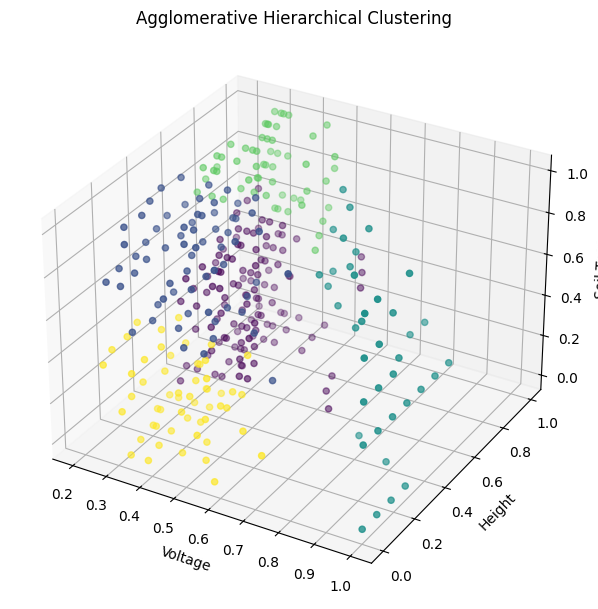

In [18]:
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
df['agg_cluster'] = agg_cluster.fit_predict(scaled)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df['voltage'], df['height'], df['soiltype'], c=df['agg_cluster'], cmap='viridis')
ax.set_title('Agglomerative Hierarchical Clustering')
ax.set_xlabel('Voltage')
ax.set_ylabel('Height')
ax.set_zlabel('Soil Type')
plt.tight_layout()
plt.show()

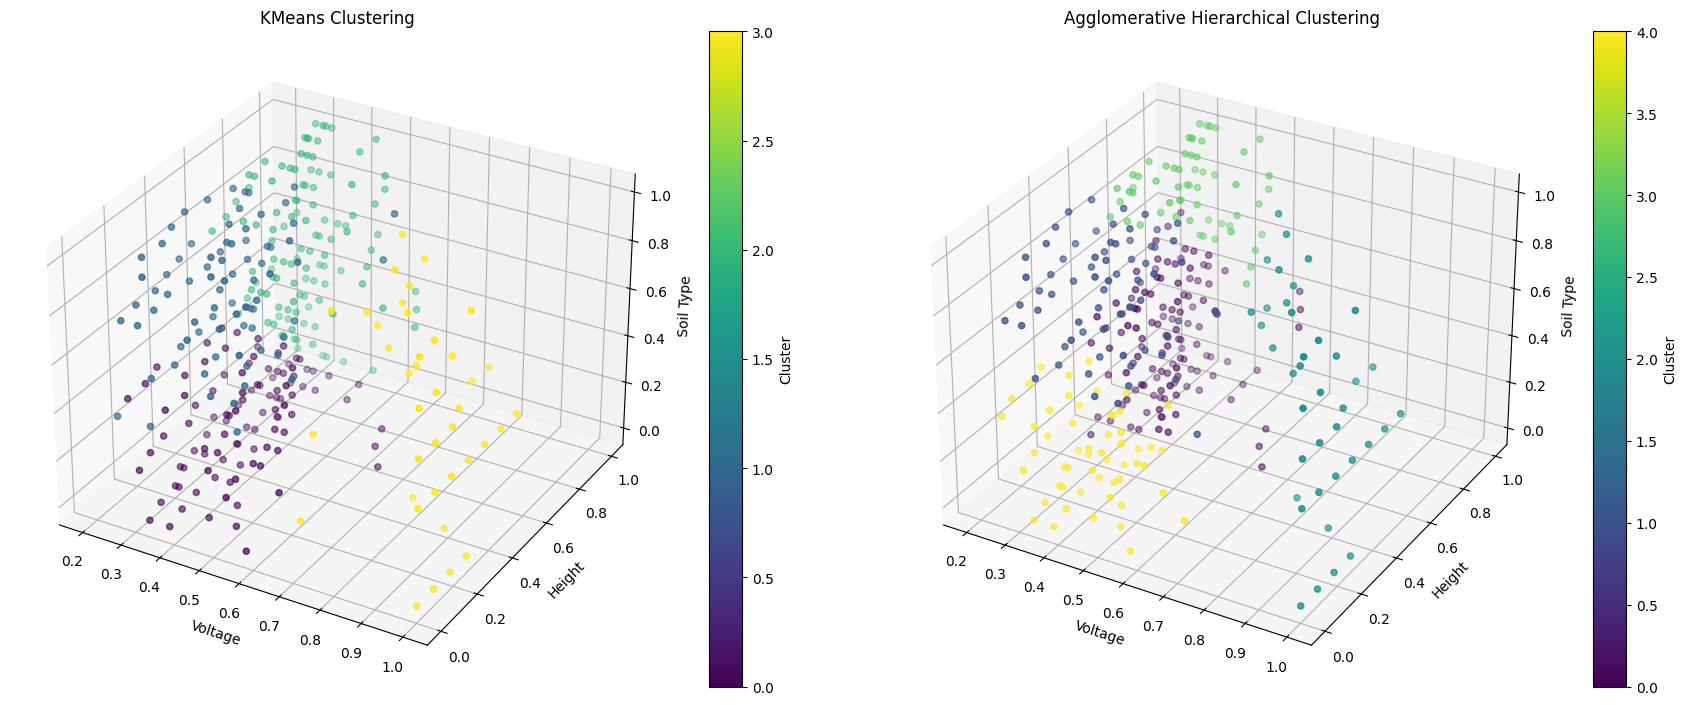

Silhouette Score for KMeans Clustering: 0.32188394526966646
Silhouette Score for Agglomerative Hierarchical Clustering: 0.3022513011310113


In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled)
df['kmeans_cluster'] = kmeans.labels_

agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage='ward')
df['agg_cluster'] = agg_cluster.fit_predict(scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), subplot_kw={'projection': '3d'})

scatter1 = ax1.scatter(df['voltage'], df['height'], df['soiltype'], c=df['kmeans_cluster'], cmap='viridis')
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Height')
ax1.set_zlabel('Soil Type')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

scatter2 = ax2.scatter(df['voltage'], df['height'], df['soiltype'], c=df['agg_cluster'], cmap='viridis')
ax2.set_title('Agglomerative Hierarchical Clustering')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Height')
ax2.set_zlabel('Soil Type')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

silhouette_kmeans = silhouette_score(scaled, df['kmeans_cluster'])
silhouette_agg = silhouette_score(scaled, df['agg_cluster'])

print(f"Silhouette Score for KMeans Clustering: {silhouette_kmeans}")
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_agg}")